## N차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

In [1]:
!pip install praw

1.2 라이브러리 설정

In [2]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leeji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leeji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1.4 API 인증을 받겠습니다. 절차의 경우 추가로 첨부한 자료를 참고해주세요.
### **과제를 제출할 때는 본 항목의 API 키들은 모두 지우고 제출해주세요! 공유되면 안 됩니다.**

In [4]:
#Reddit API 인증
reddit = praw.Reddit(
    client_id='client_id',
    client_secret='client_secret',
    password = 'password',
    user_agent='kingsejong/0.1 by /u/leejiwon6635',
    user_name='user_name'
)

### 2. 데이터 수집 및 분석

2.1 본격적으로 API를 활용해 데이터를 불러오겠습니다. 먼저 subreddit을 'stocks'로 설정하고 엔비디아 주식에 대한 게시글을 가져오겠습니다.

In [5]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')

2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하세요.

In [6]:
posts = []
for post in top_posts:
    posts.append([post.title, post.selftext])

# pandas DataFrame으로 변환
posts_df = pd.DataFrame(posts, columns=['Title', 'Text'])
posts_df[:100]

,Title,Text
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...
...,...,...
95,Nvidia says it didn’t receive antitrust subpoe...,\n\nNvidia on Wednesday denied reports it rece...
96,Nvdia to stop all product sales to Russia,Nvidia on Friday said it’s halting all product...
97,Potential big tech stocks shopping list today,The nasdaq is dropping about 2.5% as of right ...
98,WSJ - S&P 500 ends longest bear market since t...,"U.S. stocks rose Thursday, ending the S&P 500’..."


2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리를 진행하세요.

In [7]:
# 정규표현식을 이용해서 영어 소문자 대문자를 제외한 나머지 삭제
posts_df['Text'] = posts_df['Text'].str.replace("[^a-z A-Z]", "", regex=True)
posts_df['Text'][0]

'As the Fed caused a bit of a ripple in the market today and I considered vacating a position but ultimately didnt  I thought a little bit about my journey over the years and thought Id share a story and a few things Ive learnedBack in  I made my first move in the stock market by taking an  tax return and buying  shares of a coal company called Consol  At the time it traded under the symbol CNX  I bought it with almost no DD simply because it paid a pretty good dividend  Around share if I recall correctly  This is back when internet trading really wasnt a thing  I bought it through my bank and the trade cost me   I actually had to call a broker at my bank and place the trade over the phone  Ancient times right  lol  I figured win lose or draw eventually this stock will pay for itself with the dividend  I didnt follow the market much after that because I was really holding for the dividend but realized a couple of years later it had climbed into the s  Around  it had hit  and I decided 

In [8]:
# 단어 토큰화
from nltk.tokenize import word_tokenize

text_tokenized = list(map(lambda text: word_tokenize(text), posts_df['Text']))
text_tokenized[0]

['As',
 'the',
 'Fed',
 'caused',
 'a',
 'bit',
 'of',
 'a',
 'ripple',
 'in',
 'the',
 'market',
 'today',
 'and',
 'I',
 'considered',
 'vacating',
 'a',
 'position',
 'but',
 'ultimately',
 'didnt',
 'I',
 'thought',
 'a',
 'little',
 'bit',
 'about',
 'my',
 'journey',
 'over',
 'the',
 'years',
 'and',
 'thought',
 'Id',
 'share',
 'a',
 'story',
 'and',
 'a',
 'few',
 'things',
 'Ive',
 'learnedBack',
 'in',
 'I',
 'made',
 'my',
 'first',
 'move',
 'in',
 'the',
 'stock',
 'market',
 'by',
 'taking',
 'an',
 'tax',
 'return',
 'and',
 'buying',
 'shares',
 'of',
 'a',
 'coal',
 'company',
 'called',
 'Consol',
 'At',
 'the',
 'time',
 'it',
 'traded',
 'under',
 'the',
 'symbol',
 'CNX',
 'I',
 'bought',
 'it',
 'with',
 'almost',
 'no',
 'DD',
 'simply',
 'because',
 'it',
 'paid',
 'a',
 'pretty',
 'good',
 'dividend',
 'Around',
 'share',
 'if',
 'I',
 'recall',
 'correctly',
 'This',
 'is',
 'back',
 'when',
 'internet',
 'trading',
 'really',
 'wasnt',
 'a',
 'thing',
 'I',

In [9]:
# 리스트 평탄화
token_list = [item for sublist in text_tokenized for item in sublist]
token_list

['As',
 'the',
 'Fed',
 'caused',
 'a',
 'bit',
 'of',
 'a',
 'ripple',
 'in',
 'the',
 'market',
 'today',
 'and',
 'I',
 'considered',
 'vacating',
 'a',
 'position',
 'but',
 'ultimately',
 'didnt',
 'I',
 'thought',
 'a',
 'little',
 'bit',
 'about',
 'my',
 'journey',
 'over',
 'the',
 'years',
 'and',
 'thought',
 'Id',
 'share',
 'a',
 'story',
 'and',
 'a',
 'few',
 'things',
 'Ive',
 'learnedBack',
 'in',
 'I',
 'made',
 'my',
 'first',
 'move',
 'in',
 'the',
 'stock',
 'market',
 'by',
 'taking',
 'an',
 'tax',
 'return',
 'and',
 'buying',
 'shares',
 'of',
 'a',
 'coal',
 'company',
 'called',
 'Consol',
 'At',
 'the',
 'time',
 'it',
 'traded',
 'under',
 'the',
 'symbol',
 'CNX',
 'I',
 'bought',
 'it',
 'with',
 'almost',
 'no',
 'DD',
 'simply',
 'because',
 'it',
 'paid',
 'a',
 'pretty',
 'good',
 'dividend',
 'Around',
 'share',
 'if',
 'I',
 'recall',
 'correctly',
 'This',
 'is',
 'back',
 'when',
 'internet',
 'trading',
 'really',
 'wasnt',
 'a',
 'thing',
 'I',

In [10]:
# 불용어 사전
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
# 불용어 제거
token_list1 = []
for token in token_list:
    if token not in stop_words:
        token_list1.append(token)

token_list1

['As',
 'Fed',
 'caused',
 'bit',
 'ripple',
 'market',
 'today',
 'I',
 'considered',
 'vacating',
 'position',
 'ultimately',
 'didnt',
 'I',
 'thought',
 'little',
 'bit',
 'journey',
 'years',
 'thought',
 'Id',
 'share',
 'story',
 'things',
 'Ive',
 'learnedBack',
 'I',
 'made',
 'first',
 'move',
 'stock',
 'market',
 'taking',
 'tax',
 'return',
 'buying',
 'shares',
 'coal',
 'company',
 'called',
 'Consol',
 'At',
 'time',
 'traded',
 'symbol',
 'CNX',
 'I',
 'bought',
 'almost',
 'DD',
 'simply',
 'paid',
 'pretty',
 'good',
 'dividend',
 'Around',
 'share',
 'I',
 'recall',
 'correctly',
 'This',
 'back',
 'internet',
 'trading',
 'really',
 'wasnt',
 'thing',
 'I',
 'bought',
 'bank',
 'trade',
 'cost',
 'I',
 'actually',
 'call',
 'broker',
 'bank',
 'place',
 'trade',
 'phone',
 'Ancient',
 'times',
 'right',
 'lol',
 'I',
 'figured',
 'win',
 'lose',
 'draw',
 'eventually',
 'stock',
 'pay',
 'dividend',
 'I',
 'didnt',
 'follow',
 'market',
 'much',
 'I',
 'really',
 '

In [12]:
# 1자로 된 글자 제거

token_list2 = []

for token in token_list1:
    if len(token) > 1:
        token_list2.append(token)

token_list2

['As',
 'Fed',
 'caused',
 'bit',
 'ripple',
 'market',
 'today',
 'considered',
 'vacating',
 'position',
 'ultimately',
 'didnt',
 'thought',
 'little',
 'bit',
 'journey',
 'years',
 'thought',
 'Id',
 'share',
 'story',
 'things',
 'Ive',
 'learnedBack',
 'made',
 'first',
 'move',
 'stock',
 'market',
 'taking',
 'tax',
 'return',
 'buying',
 'shares',
 'coal',
 'company',
 'called',
 'Consol',
 'At',
 'time',
 'traded',
 'symbol',
 'CNX',
 'bought',
 'almost',
 'DD',
 'simply',
 'paid',
 'pretty',
 'good',
 'dividend',
 'Around',
 'share',
 'recall',
 'correctly',
 'This',
 'back',
 'internet',
 'trading',
 'really',
 'wasnt',
 'thing',
 'bought',
 'bank',
 'trade',
 'cost',
 'actually',
 'call',
 'broker',
 'bank',
 'place',
 'trade',
 'phone',
 'Ancient',
 'times',
 'right',
 'lol',
 'figured',
 'win',
 'lose',
 'draw',
 'eventually',
 'stock',
 'pay',
 'dividend',
 'didnt',
 'follow',
 'market',
 'much',
 'really',
 'holding',
 'dividend',
 'realized',
 'couple',
 'years',
 'l

2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인하세요.

In [13]:
counter = Counter(token_list2)
token_counter = dict(counter)
token_counter

{'As': 54,
 'Fed': 28,
 'caused': 11,
 'bit': 28,
 'ripple': 2,
 'market': 394,
 'today': 45,
 'considered': 7,
 'vacating': 1,
 'position': 30,
 'ultimately': 9,
 'didnt': 40,
 'thought': 22,
 'little': 31,
 'journey': 3,
 'years': 184,
 'Id': 13,
 'share': 181,
 'story': 11,
 'things': 38,
 'Ive': 44,
 'learnedBack': 1,
 'made': 62,
 'first': 93,
 'move': 124,
 'stock': 357,
 'taking': 22,
 'tax': 16,
 'return': 53,
 'buying': 87,
 'shares': 116,
 'coal': 3,
 'company': 276,
 'called': 36,
 'Consol': 3,
 'At': 24,
 'time': 175,
 'traded': 11,
 'symbol': 2,
 'CNX': 1,
 'bought': 43,
 'almost': 27,
 'DD': 23,
 'simply': 13,
 'paid': 8,
 'pretty': 36,
 'good': 69,
 'dividend': 25,
 'Around': 2,
 'recall': 3,
 'correctly': 1,
 'This': 139,
 'back': 90,
 'internet': 14,
 'trading': 114,
 'really': 80,
 'wasnt': 9,
 'thing': 33,
 'bank': 10,
 'trade': 20,
 'cost': 30,
 'actually': 33,
 'call': 68,
 'broker': 1,
 'place': 25,
 'phone': 4,
 'Ancient': 3,
 'times': 39,
 'right': 61,
 'lol': 4

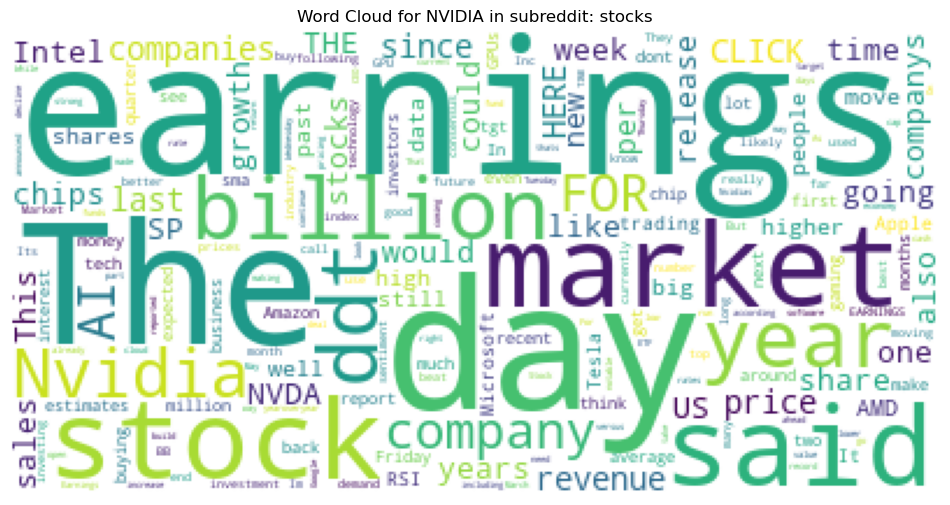

In [14]:
wc = WordCloud(background_color='white')
wc.generate_from_frequencies(token_counter)

figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.title('Word Cloud for NVIDIA in subreddit: stocks')
plt.show()

2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

In [15]:
counter = Counter(token_list2)
top_20 = dict(counter.most_common(20))
top_20

{'earnings': 545,
 'day': 510,
 'The': 460,
 'market': 394,
 'stock': 357,
 'said': 356,
 'billion': 330,
 'ddt': 302,
 'year': 298,
 'Nvidia': 291,
 'company': 276,
 'AI': 266,
 'FOR': 265,
 'companies': 260,
 'CLICK': 247,
 'HERE': 247,
 'since': 244,
 'last': 243,
 'revenue': 241,
 'price': 235}

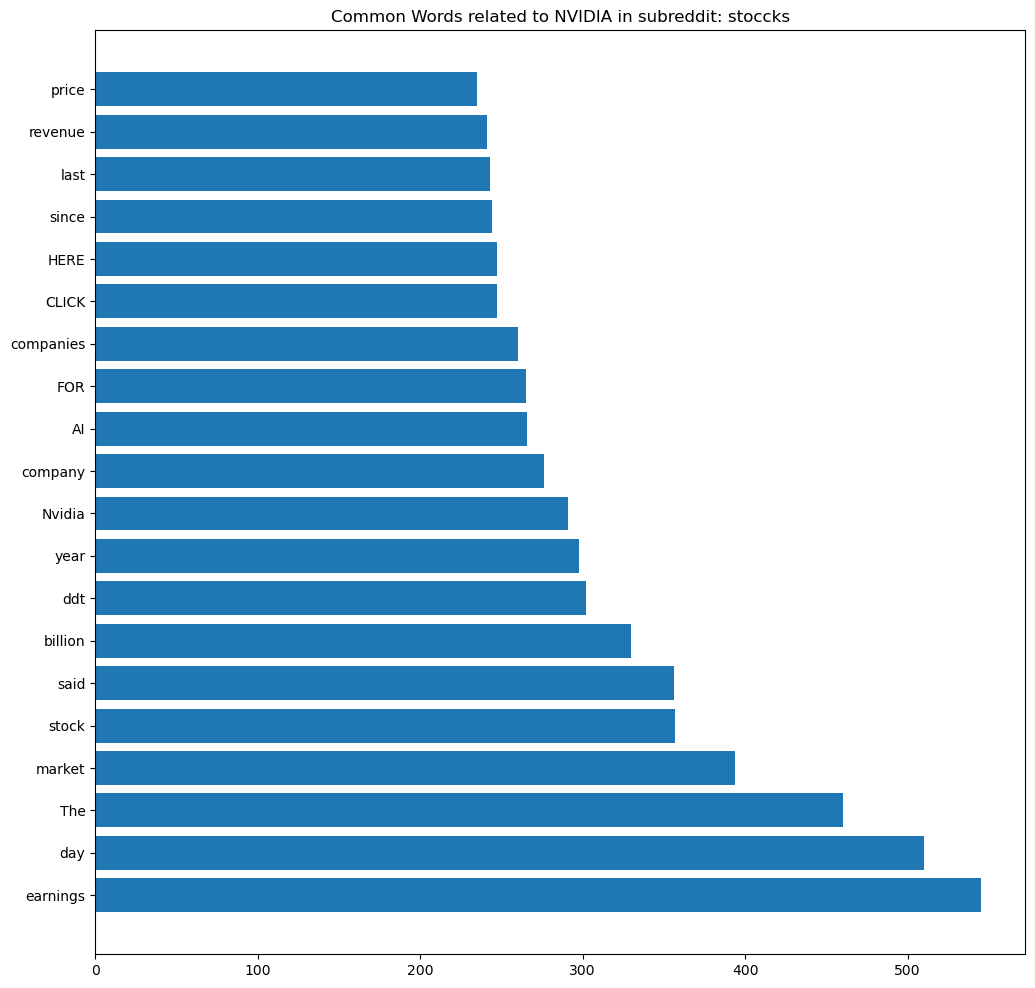

In [16]:
import numpy as np
y_pos = np.arange(len(top_20))

plt.figure(figsize=(12,12))
plt.barh(y_pos, top_20.values())
plt.title('Common Words related to NVIDIA in subreddit: stoccks')
plt.yticks(y_pos, top_20.keys())
plt.show()

# **제출 시 API 인증 부분의 id, secret은 모두 지우고 제출해주세요!**

### 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다. 추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요. 게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나 또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

In [17]:
#Reddit API 인증
reddit = praw.Reddit(
    client_id='client_id',
    client_secret='client_secret',
    password = 'password',
    user_agent='kingsejong/0.1 by /u/leejiwon6635',
    user_name='user_name'
)

In [81]:
subreddit_name = 'netflix'
search_query = 'Culinary Class Wars'
subreddit = reddit.subreddit(subreddit_name)
top_post1 = subreddit.search(search_query, limit=1000, sort='top')

In [82]:
post1 = []
for post in top_post1:
    post.comments.replace_more(limit=0)  # 더보기 표시 제거
    comments = [comment.body for comment in post.comments.list()]
    posts.append([
        post.title,
        post.score,  # score = upvote - downvote
        post.num_comments,
        post.selftext,
        post.upvote_ratio,  # upvote / upvote + downvote 비율
        comments
    ])

post1 = pd.DataFrame(posts, columns=[
    'title', 'score', 'num_comments', 'text', 'upvote_ratio', 'comments'
])
post1

,title,score,num_comments,text,upvote_ratio,comments
0,List of Netflix Originals TV Shows with IMDb R...,985,144,**Drama**\n\nTitle | Genre | Premiere | Season...,0.96,[You know what I find most interesting about t...
1,Netflix Originals Series List with IMDb Rating...,241,105,Pick your top 5 best and favorite shows from t...,0.91,"[Master of None, Stranger Things, Black Mirror..."
2,"[Canada] top 200 netflix streaming films, per ...",92,26,9.2 The Godfather (1972)\n\n9.1 The Godfather:...,0.91,"[Has anyone done this for US?, You're doing Go..."
3,List of Netflix Originals TV Shows with IMDb [...,74,23,**Drama**\n\nTitle | Genre | Premiere | Season...,0.89,"[I think Iron Fist's Genre being: ""Martial art..."
4,Leave the World Behind Explained,74,39,I'll premise this with my opinion; this movie ...,0.90,"[There was no affair.., My Grand Father smoked..."
...,...,...,...,...,...,...
116,List of Netflix Original Docu-series [ALL],15,5,**Docu-series**\n\nTitle | Genre | Premiere | ...,0.74,[Making a Murderer is exactly the kind of cont...
117,"[Canada] Top 300 Netflix streaming films, sort...",6,5,9.2 The Godfather (1972)\n 9.1 The Godf...,0.76,"[**/r/kungfucinema**, I love that the top film..."
118,Sex Education vs 13 Reasons Why,5,5,I feel like there are two Netflix originals th...,0.67,[Sex Education is a show that has depth and ca...
119,Culinary class wars is fake?,3,38,If you didnt watch episode 5 dont read. I noti...,0.55,[I don’t think it’s fake. The black spoons tha...


In [76]:
subreddit_name = 'television'
search_query = 'Culinary Class Wars'
subreddit = reddit.subreddit(subreddit_name)
top_post2 = subreddit.search(search_query, limit=1000, sort='top')

post2 = []
for post in top_post2:
    post.comments.replace_more(limit=0)  # 더보기 표시 제거
    comments = [comment.body for comment in post.comments.list()]
    posts.append([
        post.title,
        post.score,  # score = upvote - downvote
        post.num_comments,
        post.selftext,
        post.upvote_ratio,  # upvote / upvote + downvote 비율
        comments
    ])

post2 = pd.DataFrame(posts, columns=[
    'title', 'score', 'num_comments', 'text', 'upvote_ratio', 'comments'
])
post2

,title,score,num_comments,text,upvote_ratio,comments
0,List of Netflix Originals TV Shows with IMDb R...,985,144,**Drama**\n\nTitle | Genre | Premiere | Season...,0.96,[You know what I find most interesting about t...
1,Netflix Originals Series List with IMDb Rating...,241,105,Pick your top 5 best and favorite shows from t...,0.91,"[Master of None, Stranger Things, Black Mirror..."
2,"[Canada] top 200 netflix streaming films, per ...",92,26,9.2 The Godfather (1972)\n\n9.1 The Godfather:...,0.91,"[Has anyone done this for US?, You're doing Go..."
3,List of Netflix Originals TV Shows with IMDb [...,74,23,**Drama**\n\nTitle | Genre | Premiere | Season...,0.89,"[I think Iron Fist's Genre being: ""Martial art..."
4,Leave the World Behind Explained,74,39,I'll premise this with my opinion; this movie ...,0.90,"[There was no affair.., My Grand Father smoked..."
5,Arcane Vs Blue Eye Samurai,48,36,**SPOILER FREE**\n\n**This is more about how b...,0.69,[I am in the “not an anime fan” crowd. I did l...
6,What did you like or dislike about Culinary Cl...,49,64,As a food lover I thought the first 4 shows we...,0.98,[What I like:\n\n1. First cook is chef's cooki...
7,I have a lot of problems with Squid Game. Help...,42,69,SPOILERS FOR THE ENTIRE SEASON FOLLOW!\n\nAfte...,0.86,[>\tWhere did the rocks come from\n\nIt litera...
8,Culinary Class Wars,22,11,Any thoughts on this? I love the show and bing...,0.92,[I am loving it! Like physical 100 for chefs. ...
9,List of Netflix Original Docu-series [ALL],14,5,**Docu-series**\n\nTitle | Genre | Premiere | ...,0.73,[Making a Murderer is exactly the kind of cont...


In [77]:
subreddit_name = 'food'
search_query = 'Culinary Class Wars'
subreddit = reddit.subreddit(subreddit_name)
top_post3 = subreddit.search(search_query, limit=1000, sort='top')

post3 = []
for post in top_post3:
    post.comments.replace_more(limit=0)  # 더보기 표시 제거
    comments = [comment.body for comment in post.comments.list()]
    posts.append([
        post.title,
        post.score,  # score = upvote - downvote
        post.num_comments,
        post.selftext,
        post.upvote_ratio,  # upvote / upvote + downvote 비율
        comments
    ])

post3 = pd.DataFrame(posts, columns=[
    'title', 'score', 'num_comments', 'text', 'upvote_ratio', 'comments'
])
post3

,title,score,num_comments,text,upvote_ratio,comments
0,List of Netflix Originals TV Shows with IMDb R...,985,144,**Drama**\n\nTitle | Genre | Premiere | Season...,0.96,[You know what I find most interesting about t...
1,Netflix Originals Series List with IMDb Rating...,241,105,Pick your top 5 best and favorite shows from t...,0.91,"[Master of None, Stranger Things, Black Mirror..."
2,"[Canada] top 200 netflix streaming films, per ...",92,26,9.2 The Godfather (1972)\n\n9.1 The Godfather:...,0.91,"[Has anyone done this for US?, You're doing Go..."
3,List of Netflix Originals TV Shows with IMDb [...,74,23,**Drama**\n\nTitle | Genre | Premiere | Season...,0.89,"[I think Iron Fist's Genre being: ""Martial art..."
4,Leave the World Behind Explained,74,39,I'll premise this with my opinion; this movie ...,0.90,"[There was no affair.., My Grand Father smoked..."
...,...,...,...,...,...,...
71,Celebrity Chefs. Yay or Nay?,0,4,So I was thinking of celebrity chefs and I was...,0.50,[I don't know if this is contributing to the t...
72,"Cant really remember name, might be tuna gazpa...",0,0,,0.33,[]
73,"PARK HYATT SEOUL'S ""MASTERS OF FOOD & WINE"" EV...",0,0,"On Thursday, September 13, Park Hyatt [Seoul h...",0.33,[]
74,Can you try to remember something that tasted ...,0,1,Has anyone experiences eating something that w...,0.25,[/r/tipofmytongue might be able to help you re...


In [78]:
subreddit_name = 'Culinary'
search_query = 'Culinary Class Wars'
subreddit = reddit.subreddit(subreddit_name)
top_post4 = subreddit.search(search_query, limit=1000, sort='top')

post4 = []
for post in top_post4:
    post.comments.replace_more(limit=0)  # 더보기 표시 제거
    comments = [comment.body for comment in post.comments.list()]
    posts.append([
        post.title,
        post.score,  # score = upvote - downvote
        post.num_comments,
        post.selftext,
        post.upvote_ratio,  # upvote / upvote + downvote 비율
        comments
    ])

post4 = pd.DataFrame(posts, columns=[
    'title', 'score', 'num_comments', 'text', 'upvote_ratio', 'comments'
])
post4

,title,score,num_comments,text,upvote_ratio,comments
0,List of Netflix Originals TV Shows with IMDb R...,985,144,**Drama**\n\nTitle | Genre | Premiere | Season...,0.96,[You know what I find most interesting about t...
1,Netflix Originals Series List with IMDb Rating...,241,105,Pick your top 5 best and favorite shows from t...,0.91,"[Master of None, Stranger Things, Black Mirror..."
2,"[Canada] top 200 netflix streaming films, per ...",92,26,9.2 The Godfather (1972)\n\n9.1 The Godfather:...,0.91,"[Has anyone done this for US?, You're doing Go..."
3,List of Netflix Originals TV Shows with IMDb [...,74,23,**Drama**\n\nTitle | Genre | Premiere | Season...,0.89,"[I think Iron Fist's Genre being: ""Martial art..."
4,Leave the World Behind Explained,74,39,I'll premise this with my opinion; this movie ...,0.90,"[There was no affair.., My Grand Father smoked..."
...,...,...,...,...,...,...
102,Culinary school expectation vs. real life expe...,1,5,My son is 17 and in a HS tech program for Culi...,0.67,"[Restaurants can be very high paced. But, that..."
103,In need of advice,1,5,I’ve been in college for a couple years now (M...,1.00,"[Before you sign up for any kind of school, ge..."
104,online culinary school?,1,5,due to covid the culinary school i got into is...,1.00,[I would personally wait. I'm lucky enough tha...
105,Adaptive Culinary Tools,0,2,In my culinary class we have a student who has...,0.50,[as someone who uses adaptive equipment for ot...


In [87]:
posts_df = pd.concat([post1, post2, post3, post4], axis=0, ignore_index=True)
posts_df

,title,score,num_comments,text,upvote_ratio,comments
0,List of Netflix Originals TV Shows with IMDb R...,985,144,**Drama**\n\nTitle | Genre | Premiere | Season...,0.96,[You know what I find most interesting about t...
1,Netflix Originals Series List with IMDb Rating...,241,105,Pick your top 5 best and favorite shows from t...,0.91,"[Master of None, Stranger Things, Black Mirror..."
2,"[Canada] top 200 netflix streaming films, per ...",92,26,9.2 The Godfather (1972)\n\n9.1 The Godfather:...,0.91,"[Has anyone done this for US?, You're doing Go..."
3,List of Netflix Originals TV Shows with IMDb [...,74,23,**Drama**\n\nTitle | Genre | Premiere | Season...,0.89,"[I think Iron Fist's Genre being: ""Martial art..."
4,Leave the World Behind Explained,74,39,I'll premise this with my opinion; this movie ...,0.90,"[There was no affair.., My Grand Father smoked..."
...,...,...,...,...,...,...
351,Culinary school expectation vs. real life expe...,1,5,My son is 17 and in a HS tech program for Culi...,0.67,"[Restaurants can be very high paced. But, that..."
352,In need of advice,1,5,I’ve been in college for a couple years now (M...,1.00,"[Before you sign up for any kind of school, ge..."
353,online culinary school?,1,5,due to covid the culinary school i got into is...,1.00,[I would personally wait. I'm lucky enough tha...
354,Adaptive Culinary Tools,0,2,In my culinary class we have a student who has...,0.50,[as someone who uses adaptive equipment for ot...


In [88]:
posts_df['comments'][0]

["You know what I find most interesting about this? The vote totals. As we all know, Netflix doesn't release viewership numbers, but the number of people rating a show on IMDb, regardless of what the final rating is, gives some clues as to how popular it is. (Of course, if you wanted to get really accurate, you'd have to adjust for release date.)\n\nLike, why did the well-respected The Get Down get canceled? Those 17,300 votes aren't promising. (Sense8's 100,000 votes make its cancellation more mysterious, but with its budget, you might need something closer to Narcos' 215,000.) And look at Gypsy vs. Mindhunter -- Gypsy got a pathetic 7,500 votes. Mindhunter has 7,000 even though it was only released *three days ago*.",
 'Thanks for this. ',
 'You forgot “Atypical”. 8.4 on IMDb, 1 season 8 episodes, renewed, etc.',
 'Any chance someone can put them all on order of rating?\n',
 'Has anyone started Mindhunters yet? Looks interesting',
 'I imported the table to a Google Doc and re-organiz

In [89]:
def list_to_string(comment_list):
    if isinstance(comment_list, list):  # comment_list가 리스트인지 확인
        return ', '.join(comment_list)  # 리스트 요소를 쉼표로 구분하여 결합
    return comment_list  # 리스트가 아닐 경우 원래 값을 반환

# 데이터프레임에 새로운 컬럼으로 추가
posts_df['comments'] = posts_df['comments'].apply(list_to_string)
posts_df['comments'][0]

'You know what I find most interesting about this? The vote totals. As we all know, Netflix doesn\'t release viewership numbers, but the number of people rating a show on IMDb, regardless of what the final rating is, gives some clues as to how popular it is. (Of course, if you wanted to get really accurate, you\'d have to adjust for release date.)\n\nLike, why did the well-respected The Get Down get canceled? Those 17,300 votes aren\'t promising. (Sense8\'s 100,000 votes make its cancellation more mysterious, but with its budget, you might need something closer to Narcos\' 215,000.) And look at Gypsy vs. Mindhunter -- Gypsy got a pathetic 7,500 votes. Mindhunter has 7,000 even though it was only released *three days ago*., Thanks for this. , You forgot “Atypical”. 8.4 on IMDb, 1 season 8 episodes, renewed, etc., Any chance someone can put them all on order of rating?\n, Has anyone started Mindhunters yet? Looks interesting, I imported the table to a Google Doc and re-organized it by IM

In [90]:
from nltk.tokenize import sent_tokenize

sentences = []
for review in posts_df['comments']:
    sentences.extend(sent_tokenize(review))

sentences

['You know what I find most interesting about this?',
 'The vote totals.',
 "As we all know, Netflix doesn't release viewership numbers, but the number of people rating a show on IMDb, regardless of what the final rating is, gives some clues as to how popular it is.",
 "(Of course, if you wanted to get really accurate, you'd have to adjust for release date.)",
 'Like, why did the well-respected The Get Down get canceled?',
 "Those 17,300 votes aren't promising.",
 "(Sense8's 100,000 votes make its cancellation more mysterious, but with its budget, you might need something closer to Narcos' 215,000.)",
 'And look at Gypsy vs. Mindhunter -- Gypsy got a pathetic 7,500 votes.',
 'Mindhunter has 7,000 even though it was only released *three days ago*., Thanks for this.',
 ', You forgot “Atypical”.',
 '8.4 on IMDb, 1 season 8 episodes, renewed, etc., Any chance someone can put them all on order of rating?',
 ', Has anyone started Mindhunters yet?',
 'Looks interesting, I imported the table t

In [91]:
import re
sentence_removed = list(map(lambda sentence: re.sub('[^a-z A-Z]', '', sentence), sentences))
sentence_removed

['You know what I find most interesting about this',
 'The vote totals',
 'As we all know Netflix doesnt release viewership numbers but the number of people rating a show on IMDb regardless of what the final rating is gives some clues as to how popular it is',
 'Of course if you wanted to get really accurate youd have to adjust for release date',
 'Like why did the wellrespected The Get Down get canceled',
 'Those  votes arent promising',
 'Senses  votes make its cancellation more mysterious but with its budget you might need something closer to Narcos ',
 'And look at Gypsy vs Mindhunter  Gypsy got a pathetic  votes',
 'Mindhunter has  even though it was only released three days ago Thanks for this',
 ' You forgot Atypical',
 ' on IMDb  season  episodes renewed etc Any chance someone can put them all on order of rating',
 ' Has anyone started Mindhunters yet',
 'Looks interesting I imported the table to a Google Doc and reorganized it by IMDB rating',
 'Feel free to make a copy and or

In [92]:
len(sentence_removed)

21863

In [93]:
# 단어 토큰화
from nltk.tokenize import word_tokenize
comments_list = list(map(lambda comment: word_tokenize(comment), sentence_removed))
comments_list

[['You', 'know', 'what', 'I', 'find', 'most', 'interesting', 'about', 'this'],
 ['The', 'vote', 'totals'],
 ['As',
  'we',
  'all',
  'know',
  'Netflix',
  'doesnt',
  'release',
  'viewership',
  'numbers',
  'but',
  'the',
  'number',
  'of',
  'people',
  'rating',
  'a',
  'show',
  'on',
  'IMDb',
  'regardless',
  'of',
  'what',
  'the',
  'final',
  'rating',
  'is',
  'gives',
  'some',
  'clues',
  'as',
  'to',
  'how',
  'popular',
  'it',
  'is'],
 ['Of',
  'course',
  'if',
  'you',
  'wanted',
  'to',
  'get',
  'really',
  'accurate',
  'youd',
  'have',
  'to',
  'adjust',
  'for',
  'release',
  'date'],
 ['Like',
  'why',
  'did',
  'the',
  'wellrespected',
  'The',
  'Get',
  'Down',
  'get',
  'canceled'],
 ['Those', 'votes', 'arent', 'promising'],
 ['Senses',
  'votes',
  'make',
  'its',
  'cancellation',
  'more',
  'mysterious',
  'but',
  'with',
  'its',
  'budget',
  'you',
  'might',
  'need',
  'something',
  'closer',
  'to',
  'Narcos'],
 ['And',
  'l

In [94]:
# 불용어 제거
token_list = []
for content in comments_list:
    stopwords_removed_sentence = [token for token in content if token not in stop_words]
    token_list.append(stopwords_removed_sentence)

token_list

[['You', 'know', 'I', 'find', 'interesting'],
 ['The', 'vote', 'totals'],
 ['As',
  'know',
  'Netflix',
  'doesnt',
  'release',
  'viewership',
  'numbers',
  'number',
  'people',
  'rating',
  'show',
  'IMDb',
  'regardless',
  'final',
  'rating',
  'gives',
  'clues',
  'popular'],
 ['Of',
  'course',
  'wanted',
  'get',
  'really',
  'accurate',
  'youd',
  'adjust',
  'release',
  'date'],
 ['Like', 'wellrespected', 'The', 'Get', 'Down', 'get', 'canceled'],
 ['Those', 'votes', 'arent', 'promising'],
 ['Senses',
  'votes',
  'make',
  'cancellation',
  'mysterious',
  'budget',
  'might',
  'need',
  'something',
  'closer',
  'Narcos'],
 ['And',
  'look',
  'Gypsy',
  'vs',
  'Mindhunter',
  'Gypsy',
  'got',
  'pathetic',
  'votes'],
 ['Mindhunter',
  'even',
  'though',
  'released',
  'three',
  'days',
  'ago',
  'Thanks'],
 ['You', 'forgot', 'Atypical'],
 ['IMDb',
  'season',
  'episodes',
  'renewed',
  'etc',
  'Any',
  'chance',
  'someone',
  'put',
  'order',
  'rat

In [95]:
# 리스트 평탄화
token_list1 = [item for sublist in token_list for item in sublist]
token_list1

['You',
 'know',
 'I',
 'find',
 'interesting',
 'The',
 'vote',
 'totals',
 'As',
 'know',
 'Netflix',
 'doesnt',
 'release',
 'viewership',
 'numbers',
 'number',
 'people',
 'rating',
 'show',
 'IMDb',
 'regardless',
 'final',
 'rating',
 'gives',
 'clues',
 'popular',
 'Of',
 'course',
 'wanted',
 'get',
 'really',
 'accurate',
 'youd',
 'adjust',
 'release',
 'date',
 'Like',
 'wellrespected',
 'The',
 'Get',
 'Down',
 'get',
 'canceled',
 'Those',
 'votes',
 'arent',
 'promising',
 'Senses',
 'votes',
 'make',
 'cancellation',
 'mysterious',
 'budget',
 'might',
 'need',
 'something',
 'closer',
 'Narcos',
 'And',
 'look',
 'Gypsy',
 'vs',
 'Mindhunter',
 'Gypsy',
 'got',
 'pathetic',
 'votes',
 'Mindhunter',
 'even',
 'though',
 'released',
 'three',
 'days',
 'ago',
 'Thanks',
 'You',
 'forgot',
 'Atypical',
 'IMDb',
 'season',
 'episodes',
 'renewed',
 'etc',
 'Any',
 'chance',
 'someone',
 'put',
 'order',
 'rating',
 'Has',
 'anyone',
 'started',
 'Mindhunters',
 'yet',
 'Lo

In [96]:
counter = Counter(token_list1)
top_50 = dict(counter.most_common(50))
top_50

{'I': 8765,
 'show': 2850,
 'The': 2658,
 'like': 2411,
 'shows': 1309,
 'would': 1257,
 'really': 1244,
 'think': 1234,
 'people': 1210,
 'dont': 1185,
 'one': 1098,
 'Im': 1081,
 'Its': 1036,
 'good': 986,
 'season': 964,
 'get': 950,
 'It': 915,
 'know': 769,
 'time': 756,
 'much': 751,
 'see': 736,
 'lot': 735,
 'first': 714,
 'great': 696,
 'even': 667,
 'watch': 667,
 'didnt': 642,
 'make': 629,
 'also': 608,
 'list': 603,
 'But': 589,
 'way': 562,
 'still': 553,
 'could': 545,
 'And': 543,
 'Netflix': 539,
 'love': 537,
 'better': 534,
 'characters': 530,
 'got': 513,
 'something': 508,
 'pretty': 506,
 'episode': 498,
 'This': 496,
 'going': 495,
 'If': 478,
 'episodes': 463,
 'You': 460,
 'though': 455,
 'thats': 449}

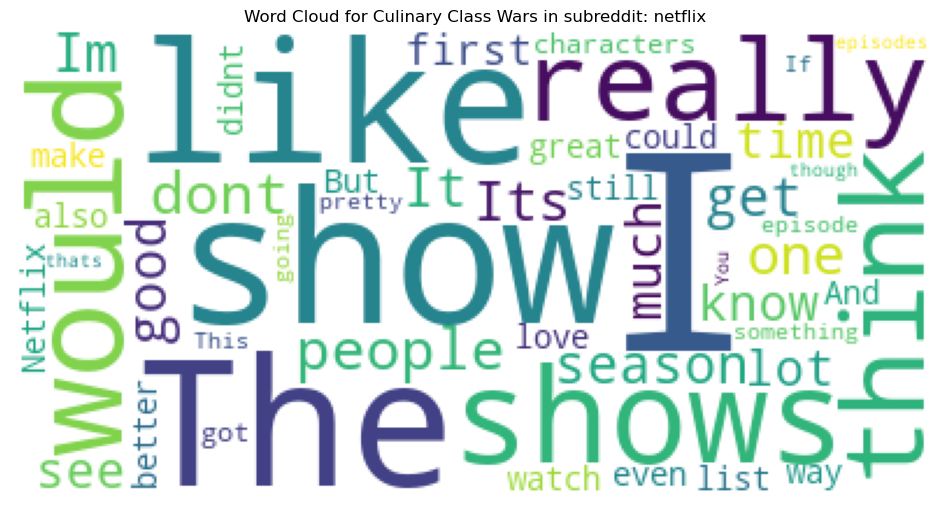

In [97]:
wc = WordCloud(background_color='white')
wc.generate_from_frequencies(top_50)

figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.title('Word Cloud for Culinary Class Wars in subreddit: netflix')
plt.show()

# 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA 토픽 모델링)
토픽 모델링은 문서의 집합에서 토픽을 찾아내는 프로세스를 말합니다. 이는 검색 엔진, 고객 민원 시스템 등과 같이 문서의 주제를 알아내는 일이 중요한 곳에서 사용됩니다. 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)은 토픽 모델링의 대표적인 알고리즘입니다. 줄여서 LDA라고 합니다.

LDA는 문서들은 토픽들의 혼합으로 구성되어져 있으며, 토픽들은 확률 분포에 기반하여 단어들을 생성한다고 가정합니다. 데이터가 주어지면, LDA는 문서가 생성되던 과정을 역추적합니다.

LDA는 각 문서의 토픽 분포와 각 토픽 내의 단어 분포를 추정합니다.

<각 문서의 토픽 분포>  
문서1 : 토픽 A 100%  
문서2 : 토픽 B 100%  
문서3 : 토픽 B 60%, 토픽 A 40%  

<각 토픽의 단어 분포>  
토픽A : 사과 20%, 바나나 40%, 먹어요 40%, 귀여운 0%, 강아지 0%, 깜찍하고 0%, 좋아요 0%  
토픽B : 사과 0%, 바나나 0%, 먹어요 0%, 귀여운 33%, 강아지 33%, 깜찍하고 16%, 좋아요 16%

LDA는 토픽의 제목을 정해주지 않지만, 이 시점에서 알고리즘의 사용자는 위 결과로부터 두 토픽이 각각 과일에 대한 토픽과 강아지에 대한 토픽이라고 판단해볼 수 있습니다. 이제 LDA에 대해서 알아봅시다. 실제로 LDA는 아래의 설명보다 훨씬 더 복잡하지만, 여기서는 수학적인 수식은 배제하고 개념적 이해에 초점을 둡니다.

In [30]:
!pip install pyLDAvis
from gensim import corpora # 단어 빈도수 계산
import gensim # LDA 모델 활용 목적
import pyLDAvis.gensim_models # LDA 시각화용

In [98]:
# 추가적인 불용어 제거
stopwords_plus = ['I', 'like', 'show', 'Netflix', 'The', 'shows', 'Korean', 'Im' 'dont', 'didnt', 'But', 'And', 'also', 'could', 'So', 'still', 'though', 'doesnt','youd','arent', 'may', 'It', 'Its', 'Id', 'Im', 'one', 'One', "would", 'dont', 'people']
last_list = []
for content in token_list:
    stopwords_removed_sentence = [token for token in content if token not in stopwords_plus]
    last_list.append(stopwords_removed_sentence)

last_list

[['You', 'know', 'find', 'interesting'],
 ['vote', 'totals'],
 ['As',
  'know',
  'release',
  'viewership',
  'numbers',
  'number',
  'rating',
  'IMDb',
  'regardless',
  'final',
  'rating',
  'gives',
  'clues',
  'popular'],
 ['Of',
  'course',
  'wanted',
  'get',
  'really',
  'accurate',
  'adjust',
  'release',
  'date'],
 ['Like', 'wellrespected', 'Get', 'Down', 'get', 'canceled'],
 ['Those', 'votes', 'promising'],
 ['Senses',
  'votes',
  'make',
  'cancellation',
  'mysterious',
  'budget',
  'might',
  'need',
  'something',
  'closer',
  'Narcos'],
 ['look', 'Gypsy', 'vs', 'Mindhunter', 'Gypsy', 'got', 'pathetic', 'votes'],
 ['Mindhunter', 'even', 'released', 'three', 'days', 'ago', 'Thanks'],
 ['You', 'forgot', 'Atypical'],
 ['IMDb',
  'season',
  'episodes',
  'renewed',
  'etc',
  'Any',
  'chance',
  'someone',
  'put',
  'order',
  'rating'],
 ['Has', 'anyone', 'started', 'Mindhunters', 'yet'],
 ['Looks',
  'interesting',
  'imported',
  'table',
  'Google',
  'Doc'

In [99]:
# LDA 토픽 모델링
# 하이퍼파라미터
NUM_TOPICS = 5 # 토픽 개수
PASSES = 10 # 전체 corpus로 모델 학습 횟수 결정

In [100]:
# 모델 학습 함수
def lda_modeling(token_list):
    # 단어 인코딩 및 빈도수 계산
    dictionary = corpora.Dictionary(token_list)
    dictionary.filter_extremes(no_below=2, no_above=0.5) # 빈도 2이상 포함, 전체 문서의 50% 이상 등장하는 단어 제거
    corpus = [dictionary.doc2bow(token) for token in token_list]
    # LDA 모델 학습
    model = gensim.models.ldamodel.LdaModel(corpus,
                                          num_topics = NUM_TOPICS,
                                          id2word = dictionary,
                                          passes = PASSES)
    return model, corpus, dictionary

In [101]:
# 토픽별 단어 구성 출력 함수
def print_topic_prop(topics):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num": list(range(1, NUM_TOPICS +1)), "word_prop":topic_values})
    return topic_prop
  #topic_prop.to_excel('topic_prop_' + RATING + '.xlsx')

In [102]:
# 토픽 모델링
model, corpus, dictionary = lda_modeling(last_list)
NUM_WORDS = 10 # 토픽별 구성 단어

In [103]:
topics = model.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics)

,topic_num,word_prop
0,1,"0.006*""watch"" + 0.006*""school"" + 0.006*""love"" ..."
1,2,"0.008*""good"" + 0.007*""great"" + 0.007*""think"" +..."
2,3,"0.012*""really"" + 0.006*""get"" + 0.006*""see"" + 0..."
3,4,"0.008*""season"" + 0.007*""really"" + 0.007*""lot"" ..."
4,5,"0.007*""think"" + 0.006*""make"" + 0.006*""funny"" +..."


## 최적의 토픽 수 구하기

## Coherence
토픽 수에 따라Coherence(응집도)를 측정하고 응집도가 최대치가 되는 토픽 수를 최종적으로 결정한다. 응집도는 토픽을 구성하는 단어들의 관련성이 얼마나 높은지를 측정한다.

k= 2 
Coherence Score:  0.3458013438973114
k= 3 
Coherence Score:  0.40726681559501715
k= 4 
Coherence Score:  0.34129701408364077
k= 5 
Coherence Score:  0.3433848713662594
k= 6 
Coherence Score:  0.3442136398453499
k= 7 
Coherence Score:  0.30020367695279143
k= 8 
Coherence Score:  0.33502086946408527
k= 9 
Coherence Score:  0.3313256487506626
k= 10 
Coherence Score:  0.3376938274846706
k= 11 
Coherence Score:  0.3171430445741403
k= 12 
Coherence Score:  0.34643380132617296
k= 13 
Coherence Score:  0.3388618521269542
k= 14 
Coherence Score:  0.32056464950544517
k= 15 
Coherence Score:  0.33572805257614574
k= 16 
Coherence Score:  0.32962280019024776
k= 17 
Coherence Score:  0.3221094650048367
k= 18 
Coherence Score:  0.35009622913457267
k= 19 
Coherence Score:  0.36872623980023933
k= 20 
Coherence Score:  0.3772360747088764
k= 21 
Coherence Score:  0.3685619017932029
k= 22 
Coherence Score:  0.3705566813794956
k= 23 
Coherence Score:  0.3898745153213184
k= 24 
Coherence Score:  0.357

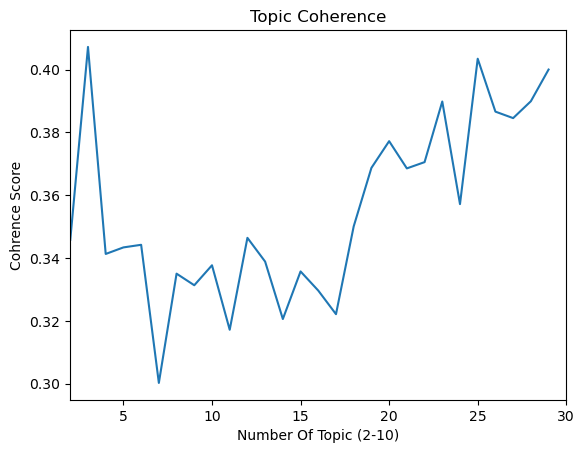

In [104]:
from gensim.models import CoherenceModel

coherence_score=[]

for i in range(2,30):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=i, passes= PASSES)
    coherence_model = CoherenceModel(model, texts=last_list, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model.get_coherence()
    print('k=',i,'\nCoherence Score: ', coherence_lda)
    coherence_score.append(coherence_lda)

k=[]
for i in range(2,30):
    k.append(i)

x = k
y= coherence_score
plt.title('Topic Coherence')
plt.plot(x,y)
plt.xlim(2,30)
plt.xlabel('Number Of Topic (2-10)')
plt.ylabel('Cohrence Score')
plt.show()

## Perplexity
이 값이 낮을수록 LDA 모형이 텍스트를 분석할 때 우수한 일반화 능력을 나타낸다.

k= 2 
 Perplexity Score:  -8.308883729483144
k= 3 
 Perplexity Score:  -8.309288038716472
k= 4 
 Perplexity Score:  -8.307261278578467
k= 5 
 Perplexity Score:  -8.309638144289082
k= 6 
 Perplexity Score:  -8.306294121200814
k= 7 
 Perplexity Score:  -8.296739995848576
k= 8 
 Perplexity Score:  -8.284999163194005
k= 9 
 Perplexity Score:  -8.28142419388431


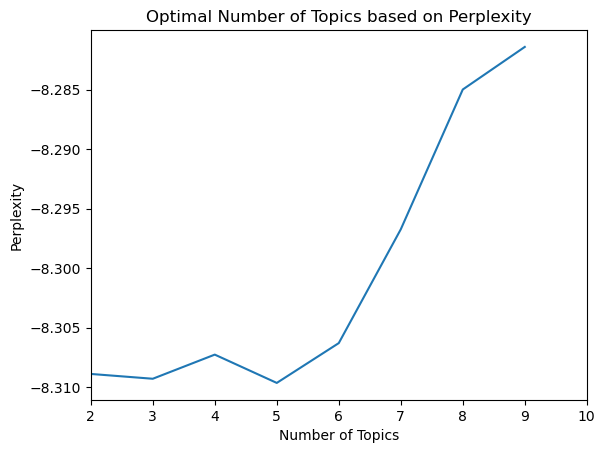

In [106]:
perplexity_values = []
for i in range(2, 10):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=i, passes=PASSES)
    perplexity = model.log_perplexity(corpus)
    perplexity_values.append(perplexity)
    print('k=',i,'\n Perplexity Score: ', perplexity)

k=[]
for i in range(2, 10):
    k.append(i)

x = k
y = perplexity_values
plt.plot(x, y)
plt.xlabel("Number of Topics")
plt.xlim(2, 10)
plt.ylabel("Perplexity")
plt.title("Optimal Number of Topics based on Perplexity")
plt.show()

## 최종 LDA 모델

In [109]:
# 하이퍼파라미터
NUM_TOPICS = 3 # 토픽 개수
PASSES = 10 # 전체 corpus로 모델 학습 횟수 결정

# 토픽 모델링
final_model, corpus, dictionary = lda_modeling(last_list)
NUM_WORDS = 20 # 토픽별 구성 단어

topics = final_model.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics)

,topic_num,word_prop
0,1,"0.006*""think"" + 0.005*""love"" + 0.005*""funny"" +..."
1,2,"0.006*""good"" + 0.005*""watch"" + 0.005*""really"" ..."
2,3,"0.009*""really"" + 0.008*""think"" + 0.007*""season..."


In [110]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook() # added
vis = pyLDAvis.gensim.prepare(final_model, corpus, dictionary, sort_topics=False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.165957 -0.082609       1        1  30.195195
1     -0.159055 -0.093851       2        1  33.180612
2     -0.006902  0.176460       3        1  36.624193, topic_info=        Term        Freq       Total Category  logprob  loglift
1190   funny  306.000000  306.000000  Default  30.0000  30.0000
610   better  508.000000  508.000000  Default  29.0000  29.0000
325     That  297.000000  297.000000  Default  28.0000  28.0000
1175    keep  235.000000  235.000000  Default  27.0000  27.0000
682     year  306.000000  306.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
548      lot  264.818951  698.533839   Topic3  -5.6490   0.0345
96     great  255.972022  660.244092   Topic3  -5.6830   0.0569
183     much  247.495969  724.149483   Topic3  -5.7167  -0.0691
39      make  233.214074  661.347544   Topic3  -5.7761  -0.0379
572     time  228.502808  727.572938   Topic3  -5.7965  -0.1537

[239 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1383      1  0.984444     All
1109      3  0.996293  Amazon
2189      1  0.996166  Arcane
338       3  0.993932      At
2190      1  0.989476     BES
...     ...       ...     ...
715       2  0.752431   years
715       3  0.159607   years
390       1  0.161674   youre
390       2  0.222633   youre
390       3  0.614892   youre

[352 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])